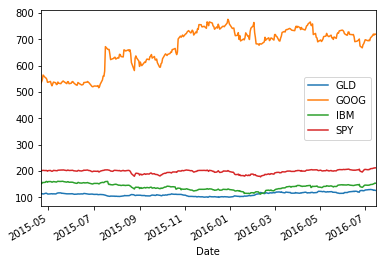

In [21]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime

def get_data(symbols, 
             add_ref=True,
             data_source='yahoo',
             price='Adj Close',
             start='1/21/2010', 
             end='4/15/2016'):
    """Read stock data (adjusted close) for given symbols from."""
    
    if add_ref and 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    df = web.DataReader(symbols, 
                        data_source=data_source,
                        start=start, 
                        end=end)
    
    return df[price,:,:]

def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # Note: Returned DataFrame must have the same number of rows
    daily_returns = (df / df.shift(1)) - 1 
    daily_returns.ix[0,:] = 0 
    return daily_returns

def fill_missing_values(df_data):
    """Fill missing values in data frame, in place."""
    df_data.fillna(method='ffill',inplace=True)
    df_data.fillna(method='backfill',inplace=True)
    return df_data

def cumulative_returns(df):
    return df/df.ix[0,:] - 1 

df = fill_missing_values(get_data(symbols=['GOOG','SPY','IBM','GLD'],
                             start='4/21/2015', 
                             end='7/15/2016'))
df.plot()
plt.show(1)

In [22]:
df.head()

,GLD,GOOG,IBM,SPY
Date,,,,
2015-04-21,115.379997,533.972413,151.610189,201.067670
2015-04-22,113.830002,539.367458,152.625483,202.055740
2015-04-23,114.660004,547.002472,157.129675,202.564164
2015-04-24,113.050003,565.062561,156.705093,203.034208
2015-04-27,115.330002,555.369995,157.581930,202.190041


In [3]:
simbols = ["A","AA","AAL","AAP","AAPL","ABB","ABBV","ABC","ABMD","ABT","ABX","ACC","ACGL","ACM","ACN","ADBE","ADI","ADM","ADNT","ADP","ADS","ADSK","AEE","AEG","AEM","AEP","AER","AES","AET","AFG","AFL","AGCO","AGN","AGNC","AGR","AGU","AIG","AIV","AIZ","AJG","AKAM","ALB","ALGN","ALK","ALKS","ALL","ALLE","ALLY","ALSN","ALV","ALXN","AM","AMAT","AMD","AME","AMG","AMGN","AMH","AMP","AMT","AMTD","AMX","AMZN","ANET","ANSS","ANTM","AON","AOS","APA","APC","APD","APH","APO","AR","ARCC","ARD","ARE","ARMK","ARNC","ARRS","ARW","ASH","ASML","ASR","ASX","ATH","ATO","ATR","ATVI","AVB","AVGO","AVY","AWK","AXP","AXS","AXTA","AYI","AZN","AZO","BA","BABA","BAC","BAH","BAM","BAP","BAX","BBBY","BBD","BBL","BBRY","BBT","BBVA","BBY","BC","BCE","BCH","BCR","BCS","BDX","BEN","BERY","BF.B","BG","BHI","BHP","BIDU","BIIB","BIO","BIP","BIVV","BK","BKFS","BLK","BLL","BMA","BMO","BMRN","BMY","BNS","BOKF","BP","BPL","BPY","BR","BRCD","BRFS","BRK.A","BRO","BRX","BSAC","BSBR","BSMX","BSX","BT","BUD","BURL","BWA","BX","BXP","C","CA","CAG","CAH","CAJ","CAT","CB","CBG","CBOE","CBS","CBSH","CC","CCE","CCI","CCK","CCL","CDK","CDNS","CDW","CE","CELG","CEO","CERN","CF","CFG","CFR","CG","CGNX","CHA","CHD","CHK","CHKP","CHL","CHRW","CHT","CHTR","CHU","CI","CINF","CIT","CL","CLNS","CLR","CLX","CM","CMA","CMCSA","CME","CMG","CMI","CMS","CNA","CNC","CNHI","CNI","CNK","CNP","CNQ","COF","COG","COH","COHR","COL","COMM","COO","COP","COST","COTY","CP","CPA","CPB","CPL","CPRT","CPT","CRH","CRM","CS","CSCO","CSGP","CSL","CSX","CTAS","CTL","CTRP","CTSH","CTXS","CUK","CVE","CVS","CVX","CX","CXO","D","DAL","DB","DCI","DCM","DCP","DD","DE","DEI","DEO","DFS","DG","DGX","DHI","DHR","DIS","DISH","DKS","DLB","DLPH","DLR","DLTR","DNKN","DOV","DOW","DOX","DPS","DPZ","DRE","DRI","DTE","DUK","DVA","DVMT","DVN","DXC","DXCM","E","EA","EBAY","EC","ECA","ECL","ED","EDU","EEP","EFX","EGN","EIX","EL","ELS","EMN","EMR","ENB","ENBL","ENIA","ENIC","ENLK","EOCC","EOG","EPD","EPR","EQGP","EQIX","EQM","EQR","EQT","ERIC","ERIE","ES","ESLT","ESRX","ESS","ETE","ETFC","ETN","ETR","EV","EVHC","EW","EWBC","EXC","EXEL","EXPD","EXPE","EXR","F","FANG","FAST","FB","FBHS","FBR","FCE.A","FCX","FDC","FDS","FDX","FE","FFIV","FIS","FISV","FITB","FL","FLEX","FLIR","FLR","FLS","FLT","FMC","FMS","FMX","FNF","FOXA","FRC","FRT","FTI","FTNT","FTV","G","GD","GDDY","GE","GG","GGG","GGP","GIB","GIL","GILD","GIS","GLPI","GLW","GM","GNTX","GOLD","GOOGL","GPC","GPN","GPS","GRMN","GS","GSK","GT","GWW","GXP","H","HAL","HAS","HBAN","HBI","HCA","HCN","HCP","HD","HDB","HDS","HES","HFC","HHC","HIG","HII","HIW","HLF","HLT","HMC","HOG","HOLX","HON","HP","HPE","HPP","HPQ","HRB","HRL","HRS","HSBC","HSIC","HST","HSY","HTA","HTHT","HUBB","HUM","HUN","IAC","IBKR","IBM","IBN","ICE","IDXX","IEP","IEX","IFF","IHG","ILMN","INCY","INFO","INFY","ING","INGR","INTC","INTU","INVH","IONS","IP","IPG","IPGP","IR","IRM","ISRG","IT","ITUB","ITW","IVZ","IX","JAZZ","JBHT","JBL","JBLU","JD","JEC","JHX","JKHY","JLL","JNJ","JNPR","JPM","JWN","K","KAR","KB","KEP","KEY","KEYS","KHC","KIM","KKR","KLAC","KMB","KMI","KMX","KO","KORS","KR","KRC","KSS","KSU","KT","KYO","L","LAMR","LAZ","LB","LBTYA","LDOS","LEA","LECO","LEG","LEN","LFC","LFL","LH","LII","LKQ","LLL","LLY","LMT","LN","LNC","LNT","LOGI","LOGM","LOW","LPL","LPT","LRCX","LUK","LULU","LUV","LUX","LVLT","LVS","LW","LYB","LYG","LYV","M","MA","MAA","MAC","MAN","MAR","MAS","MAT","MBLY","MBT","MCD","MCHP","MCK","MCO","MD","MDLZ","MDT","MDU","MELI","MET","MFC","MFG","MGA","MGM","MHK","MIC","MIDD","MJN","MKC","MKL","MKTX","MLCO","MLM","MMC","MMM","MMP","MNST","MO","MOMO","MON","MOS","MPC","MPLX","MRK","MRO","MRVL","MS","MSCC","MSCI","MSFT","MSI","MSM","MT","MTB","MTD","MTN","MTU","MU","MXIM","MYL","NBL","NCLH","NCR","NDAQ","NDSN","NEE","NEM","NEU","NFLX","NFX","NGG","NI","NKE","NLSN","NLY","NMR","NNN","NOC","NOK","NOV","NOW","NRZ","NSC","NTAP","NTES","NTRS","NUAN","NUE","NVDA","NVO","NVR","NVS","NWL","NXPI","NYCB","O","OA","OAK","OC","ODFL","OGE","OHI","OKE","OKS","OLED","OLN","OMC","ON","ORAN","ORCL","ORI","ORLY","OSK","OTEX","OXY","OZRK","PAA","PAC","PACW","PAGP","PANW","PAYX","PBCT","PBR","PCAR","PCG","PCLN","PE","PEG","PEP","PF","PFE","PFG","PG","PGR","PH","PHG","PHI","PHM","PII","PK","PKG","PKI","PKX","PLD","PM","PNC","PNR","PNRA","PNW","POOL","POST","POT","PPC","PPG","PPL","PRGO","PRU","PSA","PSO","PSX","PSXP","PTC","PTR","PUK","PVH","PWR","PX","PXD","PYPL","Q","QCOM","QGEN","QRVO","QVCA","RACE","RAI","RBS","RCI","RCL","RDS.A","RDY","RE","REG","REGN","RELX","RENX","RF","RGA","RHI","RHT","RIO","RJF","RL","RMD","RNR","ROK","ROL","ROP","ROST","RPM","RRC","RS","RSG","RSPP","RTN","RY","RYAAY","S","SABR","SAN","SAP","SATS","SBAC","SBNY","SBS","SBUX","SCCO","SCG","SCHW","SCI","SEE","SEIC","SEP","SERV","SGEN","SHG","SHLX","SHOP","SHPG","SHW","SINA","SIRI","SIVB","SIX","SJM","SJR","SKM","SLB","SLF","SLG","SLM","SLW","SMFG","SMG","SMI","SNA","SNAP","SNE","SNI","SNN","SNP","SNPS","SNV","SNY","SO","SON","SPB","SPG","SPGI","SPLK","SPLS","SPR","SQ","SRCL","SRE","SSL","SSNC","ST","STE","STI","STLD","STM","STO","STT","STWD","STX","STZ","SU","SUI","SWK","SWKS","SYF","SYK","SYMC","SYT","SYY","T","TAL","TAP","TD","TDG","TEAM","TECK","TEF","TEL","TER","TEVA","TFX","TGNA","TGT","TI","TIF","TJX","TKC","TLK","TLLP","TM","TMK","TMO","TMUS","TOL","TOT","TRGP","TRI","TRIP","TRMB","TROW","TRP","TRQ","TRU","TRV","TS","TSCO","TSLA","TSM","TSN","TSO","TSRO","TSS","TSU","TTC","TTM","TTWO","TU","TV","TWTR","TWX","TXN","TXT","TYL","UAL","UBS","UDR","UGI","UGP","UHAL","UHS","UL","ULTA","ULTI","UMC","UN","UNH","UNM","UNP","UPS","URI","USB","USFD","UTHR","UTX","V","VAL","VALE","VAR","VEDL","VEEV","VEON","VER","VFC","VIAB","VIPS","VIV","VLO","VMC","VMW","VNO","VNTV","VOD","VOYA","VRSK","VRSN","VRTX","VTR","VZ","W","WAB","WAL","WAT","WB","WBA","WBC","WBK","WCG","WCN","WDAY","WDC","WEC","WES","WF","WFC","WFM","WFT","WGP","WHR","WIT","WLK","WLTW","WM","WMB","WMT","WOOF","WPC","WPPGY","WPZ","WR","WRB","WRK","WST","WTR","WU","WUBA","WY","WYN","WYNN","XEC","XEL","XL","XLNX","XOM","XPO","XRAY","XRX","XYL","Y","YHOO","YNDX","YPF","YUM","YUMC","ZAYO","ZBH","ZBRA","ZION","ZTO","ZTS"]

In [5]:
len(simbols)

983

In [25]:
DELTA = 45 ## delay in days 
start_date = (datetime.date.today() - datetime.timedelta(DELTA)).strftime("%m-%d-%Y")
print("start_date",start_date)

start_date 03-27-2017


In [26]:
end_date = (datetime.date.today()).strftime("%m-%d-%Y")
print("end_date",end_date)

end_date 05-11-2017


In [27]:
df = fill_missing_values(get_data(symbols=simbols,
                             start=start_date, 
                             end=end_date))

/Users/gino/anaconda3/lib/python3.5/site-packages/pandas_datareader/base.py:174: SymbolWarning: Failed to read symbol: 'BF.B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/gino/anaconda3/lib/python3.5/site-packages/pandas_datareader/base.py:174: SymbolWarning: Failed to read symbol: 'BRK.A', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/gino/anaconda3/lib/python3.5/site-packages/pandas_datareader/base.py:174: SymbolWarning: Failed to read symbol: 'FCE.A', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/gino/anaconda3/lib/python3.5/site-packages/pandas_datareader/base.py:174: SymbolWarning: Failed to read symbol: 'RDS.A', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [32]:
df.shape

(32, 984)

In [28]:
df.head()

,A,AA,AAL,AAP,AAPL,ABB,ABBV,ABC,ABMD,ABT,...,YNDX,YPF,YUM,YUMC,ZAYO,ZBH,ZBRA,ZION,ZTO,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-27,53.108200,32.470001,41.740002,147.800003,140.880005,22.597819,65.448868,87.480003,125.260002,44.428253,...,22.170000,23.530001,63.212898,26.459999,33.230000,120.051783,86.500000,40.779999,12.63,53.863420
2017-03-28,53.307702,32.919998,42.599998,148.360001,143.800003,22.665505,65.330055,87.500000,125.050003,44.428253,...,22.430000,23.900000,64.168410,26.549999,32.900002,120.950002,88.580002,41.299999,12.88,54.053044
2017-03-29,52.988494,32.910000,41.959999,149.669998,144.119995,22.588149,65.122117,89.510002,124.879997,44.398432,...,22.240000,23.850000,63.750376,26.610001,32.910000,121.370003,88.830002,41.320000,13.27,53.713715
2017-03-30,53.188000,33.490002,42.540001,148.669998,143.929993,22.568809,64.815174,89.139999,125.000000,44.279163,...,22.059999,24.180000,63.720510,26.520000,32.810001,121.360001,89.559998,42.380001,13.01,53.364408
2017-03-31,52.869999,34.400002,42.299999,148.259995,143.660004,22.626826,64.518133,88.500000,125.199997,44.140015,...,21.930000,24.280001,63.601077,27.200001,32.900002,122.110001,91.250000,42.000000,13.09,53.264603


In [31]:
pd.isnull(df).sum().sum()

128